Capstone Two: Data Wrangling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
csv_files = [
    '../data/stretcher_2013_2015.csv',
    '../data/stretcher_2016_2017.csv',
    '../data/stretcher_2018_2019.csv',
    '../data/stretcher_2020_2021.csv',
    '../data/stretcher_2022_2023.csv',
]

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486812 entries, 0 to 486811
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Discharge Date                    486812 non-null  object 
 1   Discharge Time                    486812 non-null  object 
 2   Alloy                             486812 non-null  object 
 3   JOB                               486812 non-null  int64  
 4   LOT                               486812 non-null  object 
 5   MI Piece                          486812 non-null  int64  
 6   MI Thickness                      486812 non-null  float64
 7   MI Width                          486812 non-null  float64
 8   MI Length                         486812 non-null  float64
 9   Delay                             486812 non-null  float64
 10  Prestretch Force P605             486812 non-null  int64  
 11  Stretch Target P604               486812 non-null  f

In [5]:
# Update column types
df['Alloy'] = df['Alloy'].astype(str)
df['JOB'] = df['JOB'].astype(str)
df['LOT'] = df['LOT'].astype(str)
df['MI Piece'] = df['MI Piece'].astype(str)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')
df['Step 11 Start_date'] = pd.to_datetime(df['Step 11 Start_date'], errors='coerce')

In [6]:
df.dtypes

Discharge Date                      datetime64[ns]
Discharge Time                              object
Alloy                                       object
JOB                                         object
LOT                                         object
MI Piece                                    object
MI Thickness                               float64
MI Width                                   float64
MI Length                                  float64
Delay                                      float64
Prestretch Force P605                        int64
Stretch Target P604                        float64
Yield Point P610                             int64
Stretch Percent P702                       float64
Max Stretch Force P703                       int64
Step 11 Start_date                  datetime64[ns]
Step 11 Start_time                          object
Step 11 duration                            object
Pre Stretch Measured Length P715           float64
Length P601                    

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034
0,2013-01-01,12:18:57 AM,XR7AT0K50,3179890,622597A3,1,3.988,56.25,355.76,8.2,6476512,2.0,6580376,2.178052,8449903,2013-01-01,12:17:16 AM,0 00:00:07.00000,353.6535,355.76,56.25,3.988,361.3563,6476512,6580376,6476512,8449903
1,2013-01-01,12:23:03 AM,XR7AT0K50,3162736,624670A6,1,3.988,56.25,358.05,12.3,6476512,2.0,6773286,2.187799,8686119,2013-01-01,12:21:19 AM,0 00:00:07.01000,355.9468,358.05,56.25,3.988,363.7343,6476512,6773286,6476512,8686119
2,2013-01-01,12:27:42 AM,XR7AT0K50,3115404,627722A2,1,3.844,56.50,343.00,5.0,6242656,2.0,6449282,2.176928,8286410,2013-01-01,12:26:00 AM,0 00:00:15.72000,341.5384,343.00,56.50,3.844,348.9734,6242656,6449282,6242656,8286410
3,2013-01-01,12:31:53 AM,XR7AT0K50,3136864,627717A2,1,3.844,56.50,344.17,9.2,6242656,2.0,6458988,2.177896,8291038,2013-01-01,12:30:11 AM,0 00:00:15.63000,342.2903,344.17,56.50,3.844,349.7451,6242656,6458988,6242656,8291038
4,2013-01-01,12:56:20 AM,XR7AT0K50,3162724,624750A6,1,3.988,56.01,354.97,6.6,6476512,2.0,6779857,2.141514,8813926,2013-01-01,12:54:38 AM,0 00:00:13.81000,353.4370,354.97,56.01,3.988,361.0059,6476512,6779857,6476512,8813926


In [8]:
df.describe()

,Discharge Date,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034
count,486812,486812.000000,486812.000000,486812.000000,4.868120e+05,4.868120e+05,486812.000000,4.868120e+05,486812.000000,4.868120e+05,483276,486812.000000,486811.000000,486812.000000,486812.000000,486812.000000,4.868120e+05,4.868120e+05,4.868120e+05,4.868120e+05
mean,2018-09-06 10:37:49.038561024,3.265410,60.637144,309.292554,1.167715e+02,4.806003e+06,2.014173,5.011267e+06,2.166925,6.903931e+06,2018-09-06 20:51:08.755741952,306.627637,308.404533,60.384151,3.253746,314.778996,4.806003e+06,5.011267e+06,4.774859e+06,6.903931e+06
min,2013-01-01 00:00:00,0.000000,0.000000,0.000000,-7.000000e+01,0.000000e+00,0.000000,0.000000e+00,-29.528930,0.000000e+00,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,-93.360240,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2016-05-01 00:00:00,2.050000,56.000000,278.120000,1.550000e+01,2.734886e+06,2.000000,2.814564e+06,2.055442,3.923569e+06,2016-04-22 00:00:00,275.155475,277.410000,56.000000,2.050000,282.357475,2.734886e+06,2.814564e+06,2.646150e+06,3.923569e+06
50%,2018-09-19 00:00:00,2.784000,56.350000,331.180000,2.230000e+01,4.162312e+06,2.000000,4.443309e+06,2.133005,5.968046e+06,2018-09-20 00:00:00,330.536700,331.140000,56.335000,2.784000,337.739800,4.162312e+06,4.443309e+06,4.155816e+06,5.968046e+06
75%,2021-03-29 00:00:00,4.000000,67.000000,339.250000,3.240000e+01,6.242656e+06,2.000000,6.530712e+06,2.306178,8.930662e+06,2021-04-04 00:00:00,338.626025,339.160000,67.000000,4.000000,346.190725,6.242656e+06,6.530712e+06,6.214352e+06,8.930662e+06
max,2023-09-14 00:00:00,10.298000,105.000000,525.000000,4.908176e+06,1.483524e+07,5.836300,2.109101e+07,5.229858,1.960351e+07,2023-09-14 00:00:00,466.472200,422.000000,105.000000,10.298000,424.573100,1.483524e+07,2.109101e+07,1.483524e+07,1.960351e+07
std,NaN,1.714741,7.893613,47.665188,1.218944e+04,2.887562e+06,0.193260,3.047752e+06,0.266263,4.076812e+06,NaN,54.233270,50.381988,8.719737,1.723578,50.673509,2.887562e+06,3.047752e+06,2.900424e+06,4.076812e+06


In [9]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Step 11 duration,3536,0.726358
Step 11 Start_date,3536,0.726358
Length P601,1,0.000205
Discharge Date,0,0.000000
Max Stretch Force P703,0,0.000000
Yield Point P623,0,0.000000
Yield Point P6103,0,0.000000
Prestretch Force P6052,0,0.000000
Length after Stretch P716,0,0.000000
Length P603,0,0.000000


In [10]:
#See if this will work as a key
(df['JOB'] + '-' + df['LOT'] + '-' + df['MI Piece']).value_counts().head()

5180661-262068B0-2    5
6289261-375504B8-3    4
5033688-243969B3-2    4
7411022-754460B4-1    3
6587110-397968B9-1    3
Name: count, dtype: int64

In [11]:
#Added date and time to key
(df['Discharge Date'].astype(str) + '-' + df['Discharge Time'].astype(str) + '-' + df['JOB'] + '-' + df['LOT'] + '-' + df['MI Piece']).value_counts()

2023-02-26-4:13:09 AM-7685151-761658B4-2    2
2023-02-26-2:06:27 PM-7764018-475001B4-3    2
2023-02-26-2:21:33 PM-7764020-761660B0-1    2
2023-02-26-2:25:54 PM-7764020-761660B0-2    2
2023-02-26-2:30:38 PM-7755263-484737B2-1    2
                                           ..
2017-03-25-5:33:55 PM-4768412-216251B9-2    1
2017-03-25-5:29:48 PM-4768412-216251B9-1    1
2017-03-25-5:19:18 PM-4781492-218714B4-1    1
2017-03-25-5:15:08 PM-4768417-216247B7-7    1
2023-09-14-9:29:14 AM-8036701-502795B8-2    1
Name: count, Length: 486573, dtype: int64

In [12]:
# Create the key with date and time
df['key'] = df['Discharge Date'].astype(str) + '-' + df['Discharge Time'].astype(str) + '-' + df['JOB'] + '-' + df['LOT'] + '-' + df['MI Piece']

In [13]:
#How many are still duplicates?
key_counts = df['key'].value_counts()
duplicate_sum = key_counts[key_counts >= 2].sum()
duplicate_sum

478

In [14]:
# Stretch force is most import make sure take the highest force value of the duplicates and remove the other
#Compute diff_force column
df['diff_force'] = df['Max Stretch Force P703'] - df['Max Stretch Force P7034']

In [15]:
duplicate_keys = df[df.duplicated('key', keep=False)].copy()

#Keep only the max-force row per duplicate group
max_force_rows = duplicate_keys.loc[
    duplicate_keys.groupby('key')['Max Stretch Force P703'].idxmax()
]

#Get non-duplicate rows 
non_duplicates = df[~df['key'].isin(duplicate_keys['key'])]

#Combine max-force rows with non-duplicate rows
df = pd.concat([non_duplicates, max_force_rows], ignore_index=True)
df.drop(columns=['diff_force'], inplace=True)

In [16]:
row_count_pre_clean = df['key'].count()
row_count_pre_clean

486573

In [17]:
zero_stats = (df == 0).sum().sort_values(ascending=False)
zero_stats

Yield Point P6103                   5699
Yield Point P610                    5699
Pre Stretch Measured Length P715    3557
Yield Point P623                    2629
Width P602                          1941
Length P603                         1777
Length P601                         1490
Length after Stretch P716            926
Delay                                124
MI Length                             72
Stretch Percent P702                  72
Prestretch Force P605                 68
Stretch Target P604                   68
MI Width                              68
MI Thickness                          68
Prestretch Force P6052                68
Max Stretch Force P7034               33
Max Stretch Force P703                33
Discharge Date                         0
Step 11 duration                       0
Step 11 Start_time                     0
Step 11 Start_date                     0
Discharge Time                         0
MI Piece                               0
LOT             

In [18]:
df_zero_thickness = df[df['MI Thickness'] == 0]
df_zero_thickness.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key
14785,2013-07-15,4:49:13 PM,XR7AT4K75,3332345,649332A4,2,0.0,55.99,0.0,-0.6,4305000,2.0,4305000,2.110165,5867120,2013-07-15,4:47:35 PM,0 00:00:15.16000,286.7633,289.96,55.99,3.075,292.8145,4305000,4305000,4305000,5867120,2013-07-15-4:49:13 PM-3332345-649332A4-2
14882,2013-07-16,2:48:07 PM,XR7AT0K50,3326678,639803A6,1,0.0,75.00,0.0,1.0,6320550,2.0,6714148,2.175465,8519332,2013-07-16,2:46:21 PM,0 00:00:16.44000,333.0818,340.00,75.00,2.906,340.3278,6320550,6714148,6320550,8519332,2013-07-16-2:48:07 PM-3326678-639803A6-1
14903,2013-07-16,11:14:12 PM,XR7AT0K50,3331996,647431A6,1,0.0,56.00,0.0,7.0,4162312,2.0,4366972,2.148323,5553410,2013-07-16,11:12:31 PM,0 00:00:21.89000,352.7748,356.00,56.00,2.563,360.3536,4162312,4366972,4162312,5553410,2013-07-16-11:14:12 PM-3331996-647431A6-1
15452,2013-07-23,3:40:11 AM,XVKKT7H55,3344281,647003A3,1,0.0,67.79,0.0,16.7,11832870,1.7,13112730,1.767609,16685000,2013-07-23,3:38:00 AM,0 00:00:09.82000,222.8423,224.15,67.79,6.090,226.7813,11832870,13112730,11832870,16685000,2013-07-23-3:40:11 AM-3344281-647003A3-1
31758,2014-01-18,9:07:12 PM,XR7AT0K75,3484188,668463A3,1,0.0,0.00,0.0,48.4,6065514,0.0,6359543,2.116790,8805682,2014-01-18,9:05:35 PM,0 00:00:17.64000,328.9226,332.40,68.50,3.588,335.8853,6065514,6359543,6065514,8805682,2014-01-18-9:07:12 PM-3484188-668463A3-1


In [19]:
#No way to infer the missing values so remove those rows
df.drop(df[df['MI Thickness'] == 0].index, inplace=True) 

In [20]:
df_zero_width = df[df['MI Width'] == 0]
df_zero_width.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key
100116,2015-10-19,12:28:08 PM,XVKKT7H51,0,151138B5,0,4.060,0.0,0.0,124430.9,6593440,1.7,6935002,0.000000,8874542,2015-10-19,12:29:58 PM,0 00:00:21.76000,261.5624,0.00,0.00,0.000,0.000,6593440,6935002,6593440,8874542,2015-10-19-12:28:08 PM-0-151138B5-0
100145,2015-10-19,4:10:33 PM,XR6AT0K61,0,152891B8,0,2.335,0.0,0.0,124653.8,1348462,2.0,5358045,0.000000,9341594,2015-10-19,4:12:51 PM,0 00:00:13.58000,292.2637,0.00,0.00,0.000,0.000,1348462,5358045,5358045,9341594,2015-10-19-4:10:33 PM-0-152891B8-0
100402,2015-10-21,12:07:03 PM,XR7AT0K75,0,128339B9,0,3.040,0.0,0.0,127286.4,5139120,2.0,2874368,0.000000,3928348,2015-10-21,12:05:31 PM,0 00:00:17.51000,299.1341,0.00,0.00,0.000,0.000,5139120,2874368,2771440,3928348,2015-10-21-12:07:03 PM-0-128339B9-0
100403,2015-10-21,12:07:03 PM,XR7AT0K75,0,151326B6,0,2.020,0.0,0.0,127286.4,2771440,2.0,2874368,0.000000,3928348,2015-10-21,12:05:31 PM,0 00:00:17.51000,299.1341,0.00,0.00,0.000,0.000,2771440,2874368,2771440,3928348,2015-10-21-12:07:03 PM-0-151326B6-0
138734,2016-09-24,7:28:56 AM,#CALC!,4575122,195117B7,2,3.228,0.0,0.0,53.1,5242272,2.0,5993144,2.288848,7407261,2016-09-24,7:27:16 AM,0 00:00:11.00000,326.9017,326.82,56.43,3.228,334.384,5242272,5993144,5242272,7407261,2016-09-24-7:28:56 AM-4575122-195117B7-2


In [21]:
#Use column Width P602 where MI Width is zero
df.loc[df['MI Width'] == 0, 'MI Width'] = df['Width P602']

#No way to infer the remaining missing values so remove those rows
df.drop(df[df['MI Width'] == 0].index, inplace=True) 

In [22]:
df_zero_stretch_target = df[df['Stretch Target P604'] == 0]
df_zero_stretch_target.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key
22668,2013-10-14,1:34:19 AM,XVKKT6H61,3383705,652529A9,2,2.354,72.00,342.0,32.6,0,0.0,1694880,2.152941,2654826,2013-10-14,1:32:38 AM,0 00:00:20.51000,338.5773,342.0,72.00,2.354,345.8666,0,1694880,1694880,2654826,2013-10-14-1:34:19 AM-3383705-652529A9-2
22997,2013-10-16,2:58:39 PM,XR7AT0K75,3395562,656091A6,1,1.826,68.46,361.2,-4.3,0,0.0,3139484,2.113157,4162563,2013-10-16,2:57:00 PM,0 00:00:20.86000,358.4596,361.2,68.46,1.826,366.0344,0,3139484,3086853,4162563,2013-10-16-2:58:39 PM-3395562-656091A6-1
23159,2013-10-18,1:07:18 PM,XR6AT0K61,3410050,630713A6,2,2.606,67.00,335.0,1601.4,0,0.0,2566649,1.962955,3925308,2013-10-18,1:05:37 PM,0 00:00:17.14000,330.9328,335.0,67.00,2.606,337.4289,0,2566649,1833321,3925308,2013-10-18-1:07:18 PM-3410050-630713A6-2
23208,2013-10-18,8:02:10 PM,XR6AT0K61,3410046,630519A7,2,2.086,88.00,362.0,1.4,0,0.0,1927464,2.333700,2907456,2013-10-18,8:00:31 PM,0 00:00:09.22000,359.2515,362.0,88.00,2.086,367.6353,0,1927464,1927464,2907456,2013-10-18-8:02:10 PM-3410046-630519A7-2
23368,2013-10-20,4:35:42 AM,XVKKT7H51,3403307,663339A0,1,4.795,63.00,238.0,10.9,0,0.0,9751736,1.790912,12173420,2013-10-20,4:33:36 AM,0 00:00:09.70000,232.1427,238.0,63.00,4.795,236.3002,0,9751736,8760465,12173420,2013-10-20-4:35:42 AM-3403307-663339A0-1


In [23]:
df_zero_stretch_percent = df[df['Stretch Percent P702'] == 0]
df_zero_stretch_percent.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key
1715,2013-01-29,2:07:44 PM,XR7AT0K50,0,625343A9,0,3.588,56.22047,290.315,591120.7,5826912,2.0,6604415,0.0,8484100,2013-01-29,2:09:06 PM,0 00:00:10.09000,330.0179,0.00,0.00,0.000,0.0000,5826912,6604415,6242656,8484100,2013-01-29-2:07:44 PM-0-625343A9-0
1723,2013-01-29,5:27:55 PM,XR7AT0K50,3117647,753240A1,1,3.844,56.25000,340.640,151.2,6242656,2.0,0,0.0,0,2013-01-29,7:24:52 PM,0 00:00:22.50000,339.9242,340.64,56.25,3.844,339.4536,6242656,0,0,0,2013-01-29-5:27:55 PM-3117647-753240A1-1
9034,2013-05-02,4:13:44 AM,XR2AT1K24,3266744,638701A3,1,2.563,58.00000,244.500,11.6,4310966,2.0,4684866,0.0,0,2013-05-02,4:15:20 AM,0 00:00:22.38000,244.4118,0.00,0.00,0.000,249.5496,4310966,4684866,4310966,0,2013-05-02-4:13:44 AM-3266744-638701A3-1
12013,2013-06-10,7:55:11 PM,XR7AT0K75,3306019,756619A3,3,2.050,57.81000,329.450,115.2,2913050,2.0,0,0.0,0,2013-06-10,7:56:43 PM,0 00:00:18.20000,334.8793,329.45,57.81,2.050,336.7788,2913050,0,0,0,2013-06-10-7:55:11 PM-3306019-756619A3-3
15380,2013-07-22,6:15:01 AM,XVKKT7H51,3354647,639902A6,1,2.050,69.62000,336.220,-4.0,4102050,2.0,5172150,0.0,4877468,2013-07-22,6:20:24 AM,0 00:00:17.06000,333.9390,336.22,69.62,2.050,341.5797,4102050,5172150,5172150,4877468,2013-07-22-6:15:01 AM-3354647-639902A6-1


In [24]:
#No way to infer the missing values so remove those rows
df.drop(df[df['Stretch Percent P702'] == 0].index, inplace=True) 

In [25]:
df_zero_prestretch_force= df[df['Prestretch Force P605'] == 0]
df_zero_prestretch_force.head()

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key
17656,2013-08-20,11:43:35 PM,XR7AT4K75,3324139,642696A9,1,7.158,56.00,240.0,12.6,0,2.0,5170282,0.498414,6406740,2013-08-20,11:41:35 PM,0 00:00:09.45000,237.7611,240.0,56.00,7.158,238.9461,0,5170282,5010600,6406740,2013-08-20-11:43:35 PM-3324139-642696A9-1
22668,2013-10-14,1:34:19 AM,XVKKT6H61,3383705,652529A9,2,2.354,72.00,342.0,32.6,0,0.0,1694880,2.152941,2654826,2013-10-14,1:32:38 AM,0 00:00:20.51000,338.5773,342.0,72.00,2.354,345.8666,0,1694880,1694880,2654826,2013-10-14-1:34:19 AM-3383705-652529A9-2
22997,2013-10-16,2:58:39 PM,XR7AT0K75,3395562,656091A6,1,1.826,68.46,361.2,-4.3,0,0.0,3139484,2.113157,4162563,2013-10-16,2:57:00 PM,0 00:00:20.86000,358.4596,361.2,68.46,1.826,366.0344,0,3139484,3086853,4162563,2013-10-16-2:58:39 PM-3395562-656091A6-1
23159,2013-10-18,1:07:18 PM,XR6AT0K61,3410050,630713A6,2,2.606,67.00,335.0,1601.4,0,0.0,2566649,1.962955,3925308,2013-10-18,1:05:37 PM,0 00:00:17.14000,330.9328,335.0,67.00,2.606,337.4289,0,2566649,1833321,3925308,2013-10-18-1:07:18 PM-3410050-630713A6-2
23208,2013-10-18,8:02:10 PM,XR6AT0K61,3410046,630519A7,2,2.086,88.00,362.0,1.4,0,0.0,1927464,2.333700,2907456,2013-10-18,8:00:31 PM,0 00:00:09.22000,359.2515,362.0,88.00,2.086,367.6353,0,1927464,1927464,2907456,2013-10-18-8:02:10 PM-3410046-630519A7-2


In [70]:
#No way to infer the missing values so remove those rows
df.drop(df[df['Prestretch Force P605'] == 0].index, inplace=True) 

In [26]:
#No way to infer the missing values so remove those rows
df.drop(df[df['Max Stretch Force P703'] == 0].index, inplace=True) 

In [27]:
# See if there is a way to use the length columns to fill in zeros
zero_length_rows = df[
    (df['Length P603'] == 0) &
    (df['Length P601'] == 0) &
    (df['MI Length'] == 0)
]

zero_length_rows

,Discharge Date,Discharge Time,Alloy,JOB,LOT,MI Piece,MI Thickness,MI Width,MI Length,Delay,Prestretch Force P605,Stretch Target P604,Yield Point P610,Stretch Percent P702,Max Stretch Force P703,Step 11 Start_date,Step 11 Start_time,Step 11 duration,Pre Stretch Measured Length P715,Length P601,Width P602,Length P603,Length after Stretch P716,Prestretch Force P6052,Yield Point P6103,Yield Point P623,Max Stretch Force P7034,key


In [28]:
#No way to infer the missing values so remove those rows
df.loc[df['MI Length'] == 0, 'MI Length'] = df['Length P601']

In [29]:
#No way to infer the missing values so remove those rows
df.drop(df[df['Stretch Target P604'] == 0].index, inplace=True)

In [72]:
zero_stats = (df == 0).sum().sort_values(ascending=False)
zero_stats

Pre Stretch Measured Length P715    3549
Yield Point P623                    2607
Length after Stretch P716            919
Delay                                124
Discharge Date                         0
Stretch Percent P702                   0
Max Stretch Force P7034                0
Step 11 duration                       0
Step 11 Start_time                     0
Step 11 Start_date                     0
Max Stretch Force P703                 0
Stretch Target P604                    0
Discharge Time                         0
Prestretch Force P605                  0
MI Length                              0
MI Width                               0
MI Thickness                           0
MI Piece                               0
LOT                                    0
JOB                                    0
Alloy                                  0
key                                    0
dtype: int64

In [31]:
# Don't need these each columns now that we used them to fill in missing zeros
df.drop(columns=['Yield Point P6103', 'Yield Point P610', 'Width P602', 'Length P603', 'Length P601', 'Prestretch Force P6052'], inplace=True)

In [32]:
row_count_post_clean = df['key'].count()
row_count_post_clean

486401

In [33]:
row_count_removed = row_count_pre_clean - row_count_post_clean
row_count_removed_percent = (row_count_removed / row_count_pre_clean) * 100

print(f"Rows removed: {row_count_removed}")
print(f"Percentage of rows removed: {row_count_removed_percent:.2f}%")

Rows removed: 172
Percentage of rows removed: 0.04%


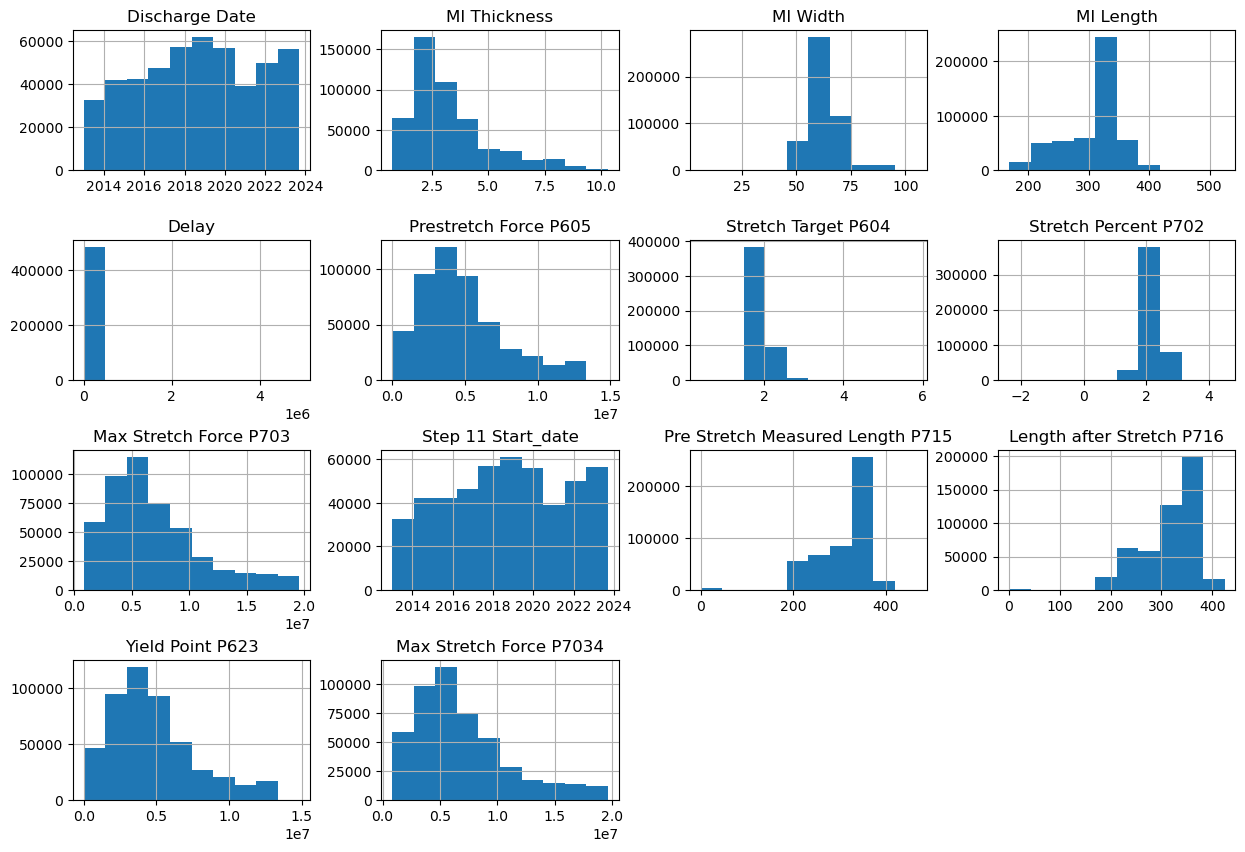

In [35]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

Distributions look good. Data is cleaned and ready for exploration.